In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import make_regression
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [3]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import  KFold, cross_val_score

In [4]:
from sklearn import svm

from sklearn.metrics import auc, confusion_matrix, classification_report, precision_score, roc_curve
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve

In [5]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Midterm 3 Avetisyan Hayk  A09160415 

### Prolem 1

In [6]:
X1, y1 = make_regression(n_samples=1000, n_features=7, n_informative=3, noise=10, random_state=15)

In [7]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.4, random_state=15)

In [8]:
tree_regression = DecisionTreeRegressor(random_state = 15)

params = { "max_leaf_nodes": np.arange(1,20)}

tree_regression_cv = GridSearchCV(tree_regression, params, cv = 3, scoring = "r2")
tree_regression_cv.fit(X1_train, y1_train)

print("Best score:", tree_regression_cv.best_score_)
print("Best parameter:", tree_regression_cv.best_params_)

Best score: 0.7839722296537289
Best parameter: {'max_leaf_nodes': 19}


In [9]:
Reg_A = DecisionTreeRegressor(random_state=15, max_leaf_nodes=19 )
Reg_A.fit(X1_train, y1_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=19,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=15, splitter='best')

In [10]:
random_forest = RandomForestRegressor(random_state = 15)

params = { "n_estimators": np.arange(1,25), "max_features": np.arange(1,25) }

random_forest_cv = GridSearchCV(random_forest, params, cv = 3, scoring = "r2")
random_forest_cv.fit(X1_train, y1_train)

print("Best score:", random_forest_cv.best_score_)
print("Best parameter:", random_forest_cv.best_params_)

Best score: 0.9341204597177913
Best parameter: {'max_features': 5, 'n_estimators': 24}


In [11]:
Reg_B = RandomForestRegressor(n_estimators=24, max_features=5, random_state=15)
Reg_B.fit(X1_train, y1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=24, n_jobs=None, oob_score=False,
                      random_state=15, verbose=0, warm_start=False)

In [12]:
ada_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 1), random_state = 15)

params = {
    "n_estimators": np.arange(1,20)
}

ada_regressor_cv = GridSearchCV(ada_regressor, params, cv = 3, scoring = "r2")
ada_regressor_cv.fit(X1_train, y1_train)

print("Best score:", ada_regressor_cv.best_score_)
print("Best parameter:", ada_regressor_cv.best_params_)

Best score: 0.6246033545905942
Best parameter: {'n_estimators': 19}


In [13]:
ada_regressor2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 2), random_state = 15)

params = {
    "n_estimators": np.arange(1,20)
}

ada_regressor_cv2 = GridSearchCV(ada_regressor2, params, cv = 3, scoring = "r2")
ada_regressor_cv2.fit(X1_train, y1_train)

print("Best score:", ada_regressor_cv2.best_score_)
print("Best parameter:", ada_regressor_cv2.best_params_)

Best score: 0.7533434638803244
Best parameter: {'n_estimators': 19}


In [14]:
ada_regressor3 = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 3), random_state = 15)

params = {
    "n_estimators": np.arange(1,20)
}

ada_regressor_cv3 = GridSearchCV(ada_regressor3, params, cv = 3, scoring = "r2")
ada_regressor_cv3.fit(X1_train, y1_train)

print("Best score:", ada_regressor_cv3.best_score_)
print("Best parameter:", ada_regressor_cv3.best_params_)

Best score: 0.8441309361724557
Best parameter: {'n_estimators': 19}


In [15]:
Reg_C = AdaBoostRegressor( DecisionTreeRegressor(max_depth = 3), n_estimators=19, random_state=15)
Reg_C.fit(X1_train, y1_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [16]:
model_A_error_test = Reg_A.score(X1_test,y1_test)
model_A_error_train = Reg_A.score(X1_train,y1_train)

print("Train score:", model_A_error_train)
print("Test score:", model_A_error_test)

Train score: 0.8641423555463259
Test score: 0.7490110445958555


In [17]:
model_B_error_test = Reg_B.score(X1_test,y1_test)
model_B_error_train = Reg_B.score(X1_train,y1_train)

print("Train score:", model_B_error_train)
print("Test score:", model_B_error_test)

Train score: 0.9902198394084556
Test score: 0.9330144735124789


In [18]:
model_C_error_test = Reg_C.score(X1_test,y1_test)
model_C_error_train = Reg_C.score(X1_train,y1_train)

print("Train score:", model_C_error_train)
print("Test score:", model_C_error_test)

Train score: 0.8914975870979894
Test score: 0.8155674473217677


As the r squared on 3 models of test and train data differs not very significantly, but there is to some extent overfitting, especially in model A. By the way it has also the lowest score and in this situation
is the worst model. In comparison the best model is the model B (random forest) with r squared 0.933 on test data which we can
consider as a pretty good model

### Problem 2

In [19]:
X2,y2 = make_gaussian_quantiles(n_samples=1000, n_features=12, n_classes=2, random_state=15)

In [20]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state=15)

In [21]:
degree_grid = np.array([1,2,3])
c_param_grid = np.linspace(0.1, 100, 20)


mod_svm_poly= svm.SVC(kernel = "poly", random_state = 15)
opt_mod_svm_poly = GridSearchCV(mod_svm_poly, 
                             param_grid = {'degree': degree_grid, 'C': c_param_grid}, scoring = "accuracy", cv = 3)

opt_mod_svm_poly.fit(X2_train, y2_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=15, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  0.1       ,   5.35789474,  10.61578947,  15.87368421,
        21.13157895,  26.38947368,  31.64736842,  36.90526316,
        42.16315789,  47.42105263,  52.67894737,  57.93684211,
        63.19473684,  68.45263158,  73.71052632,  78.96842105,
        84.22631579,  89.48421053,  94.74210526, 100.        ]),
                         'degree': array([1, 2, 3])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [22]:
print("Model Best Params %s" % opt_mod_svm_poly.best_params_)

Model Best Params {'C': 26.38947368421053, 'degree': 2}


In [23]:
Class_A = svm.SVC(kernel = "poly", random_state=15, degree = 2, C =26.38947368421053, probability=True)
Class_A.fit(X2_train, y2_train)

SVC(C=26.38947368421053, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=2, gamma='scale',
    kernel='poly', max_iter=-1, probability=True, random_state=15,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
gamma_grid = np.linspace(0.001, 1, 100)
c_param_grid = np.linspace(0.1, 100, 20)

mod_svm_radial = svm.SVC(kernel = "rbf", random_state=15)
opt_mod_svm_radial = GridSearchCV(mod_svm_radial, param_grid = {'C': c_param_grid,'gamma':gamma_grid},
                                  cv = 3, scoring = "accuracy")
opt_mod_svm_radial.fit(X2_train, y2_train)

print("Optimal Value of C: %s" % opt_mod_svm_radial.best_params_['C'])
print("Optimal Value of gamma: %s" % opt_mod_svm_radial.best_params_['gamma'])

Optimal Value of C: 10.615789473684211
Optimal Value of gamma: 0.041363636363636366


In [25]:
Class_B = svm.SVC(kernel = "rbf", random_state=15, C =10.615789473684211, probability=True,  gamma=0.041363636363636366)
Class_B.fit(X2_train, y2_train)

SVC(C=10.615789473684211, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.041363636363636366, kernel='rbf', max_iter=-1, probability=True,
    random_state=15, shrinking=True, tol=0.001, verbose=False)

In [26]:
Class_A_score_test = Class_A.score(X2_test, y2_test)
Class_B_score_test = Class_B.score(X2_test, y2_test)

print("Class_A test score:", Class_A_score_test)
print("Class_B test score:", Class_B_score_test)

Class_A test score: 0.97
Class_B test score: 0.97


Both models perform pretty well on test set 

In [27]:
y_pred_polySVC = Class_A.predict(X2_test)
pred_prob_polySVC = Class_A.predict_proba(X2_test)

In [28]:
fpr0_polySVC, tpr0_polySVC, thresholds0_polySVC = roc_curve(y2_test, pred_prob_polySVC[:,0], pos_label = 0) 
fpr1_polySVC, tpr1_polySVC, thresholds1_polySVC = roc_curve(y2_test, pred_prob_polySVC[:,1], pos_label = 1)


p0_polySVC, r0_polySVC, thresholds0_polySVC = precision_recall_curve(y2_test, pred_prob_polySVC[:,0], pos_label = 0)
p1_polySVC, r1_polySVC, thresholds1_polySVC = precision_recall_curve(y2_test, pred_prob_polySVC[:,1], pos_label = 1)


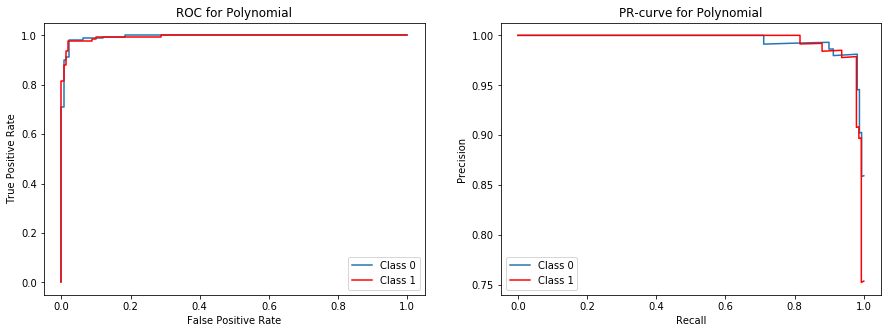

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_polySVC, tpr0_polySVC, "-", label = "Class 0")
plt.plot(fpr1_polySVC, tpr1_polySVC, "-", color = 'r', label = "Class 1")

plt.title("ROC for Polynomial")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_polySVC, p0_polySVC, "-", label = "Class 0")
plt.plot(r1_polySVC, p1_polySVC, "-", color = 'r', label = "Class 1")

plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve for Polynomial")

plt.show()

In [30]:
y_pred_rbfSVC = Class_B.predict(X2_test)
pred_prob_rbfSVC = Class_B.predict_proba(X2_test)

In [31]:
fpr0_rbfSVC, tpr0_rbfSVC, thresholds0_rbfSVC = roc_curve(y2_test, pred_prob_rbfSVC[:,0], pos_label = 0) 
fpr1_rbfSVC, tpr1_rbfSVC, thresholds1_rbfSVC = roc_curve(y2_test, pred_prob_rbfSVC[:,1], pos_label = 1)


p0_rbfSVC, r0_rbfSVC, thresholds0_rbfSVC = precision_recall_curve(y2_test, pred_prob_rbfSVC[:,0], pos_label = 0)
p1_rbfSVC, r1_rbfSVC, thresholds1_rbfSVC = precision_recall_curve(y2_test, pred_prob_rbfSVC[:,1], pos_label = 1)

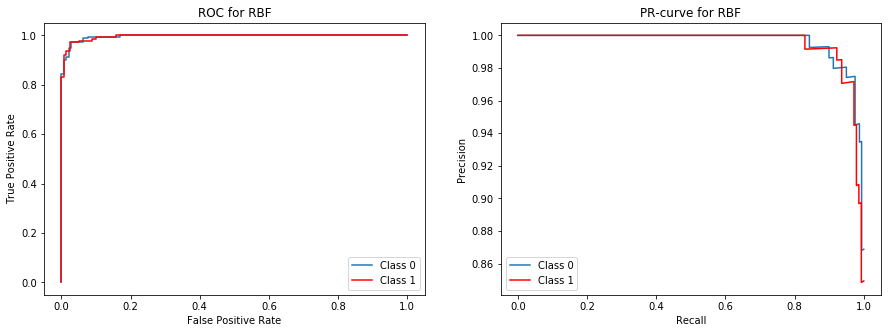

In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_rbfSVC, tpr0_rbfSVC, "-", label = "Class 0")
plt.plot(fpr1_rbfSVC, tpr1_rbfSVC, "-", color = 'r', label = "Class 1")

plt.title("ROC for RBF")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_rbfSVC, p0_rbfSVC, "-", label = "Class 0")
plt.plot(r1_rbfSVC, p1_rbfSVC, "-", color = 'r', label = "Class 1")

plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve for RBF")

plt.show()

In [33]:
print("Polynomial ROC: AUC Class 0: ", auc(fpr0_polySVC, tpr0_polySVC))
print("Polynomial ROC: AUC Class 1: ", auc(fpr1_polySVC, tpr1_polySVC))
print("Polynomial Precision-Recall: AUC Class 1:", auc(r0_polySVC, p0_polySVC))
print("Polynomial Precision-Recall: AUC Class 1:", auc(r1_polySVC, p1_polySVC))

Polynomial ROC: AUC Class 0:  0.9946920023194612
Polynomial ROC: AUC Class 1:  0.9946920023194612
Polynomial Precision-Recall: AUC Class 1: 0.9951646662517212
Polynomial Precision-Recall: AUC Class 1: 0.9945415058666381


In [34]:
print("RBF ROC: AUC Class 0: ", auc(fpr0_rbfSVC, tpr0_rbfSVC))
print("RBF ROC: AUC Class 1: ", auc(fpr1_rbfSVC, tpr1_rbfSVC))
print("RBF Precision-Recall: AUC Class 0:", auc(r0_rbfSVC, p0_rbfSVC))
print("RBF Precision-Recall: AUC Class 1:", auc(r1_rbfSVC, p1_rbfSVC))


RBF ROC: AUC Class 0:  0.9955394977474463
RBF ROC: AUC Class 1:  0.9955394977474463
RBF Precision-Recall: AUC Class 0: 0.9961071755390617
RBF Precision-Recall: AUC Class 1: 0.9951790595204875


AUC for ROC curve for both classes is slightly better in Model A, however the difference is very small. The same is situation 
occurs in case of AUCs of PR curve. We can conclude that polynomial kernel is slightly better model. 

In [35]:
Class_A_score_train = Class_A.score(X2_train, y2_train)
Class_B_score_train = Class_B.score(X2_train, y2_train)

print("Class_A train score:", Class_A_score_train)
print("Class_B train score:", Class_B_score_train)

Class_A_score_test = Class_A.score(X2_test, y2_test)
Class_B_score_test = Class_B.score(X2_test, y2_test)

print("Class_A test score:", Class_A_score_test)
print("Class_B test score:", Class_B_score_test)

Class_A train score: 0.9814285714285714
Class_B train score: 0.9971428571428571
Class_A test score: 0.97
Class_B test score: 0.97


As the r squared of both models both in case of train and test data differs from each other insignificantly we can conclude 
the there is no overfitting of train data. In case of overfitting we would expect high r squared on train data but poor performance on test data which is not the case in our models.